# Review
The content was pretty simple, it went over histograms and their utility. The author did a great job walking through how they show the distribution of a pregnancy data set and with analyzing the claim that: *First babies tend to arrive late*

I have a couple takeaways:
1. **Effect Size** is a summary statistic intended to describe teh size of an effect. Particularly Cohen's *d* statistic is a way to compare the difference between groups to thier variability. Here are more [Effect Size Statistics]( https://en.wikipedia.org/wiki/Effect_size)
2. Here are some characteristics we might want to look at when performing EDA with a histogram:
    1. **central tendency**: Do the values tend to cluster around a particular point?
    2. **mode**: Is there more than one cluster?
    3. **spread**: How much variability is there in the values?
    4. **tails**: How quickly do the probabilities drop off as we move away from the modes?
    5. **outliers**: Are there extreme values far from the modes?

# Excercises

## Exercise 1
Based on the results in this chapter, suppose you were asked to summarize what you learned about whether first babies arrive late.
1. Which summary statistics would you use if you wanted to get a story on the evening news? 
2. Which ones would you use if you wanted to reassure an anxious patient?

### Part 1

If I was going to get on the evening news it would be important to make sure the my claim had as much shock value as possible! In section 2.6 we saw a relatively large disparity between first and other in the 39th week, which is of course the expected pregnancy length.

Let's grab some data so see what we can sensationalize.

In [1]:
import nsfg
preg = nsfg.ReadFemPreg()
live = preg[preg.outcome == 1]
firsts = live[live.birthord == 1]
others = live[live.birthord != 1]

In [2]:
print('Percentage of first births at 39 weeks:',
      sum(firsts.prglngth == 39) / len(firsts.index))
print('Percentage of later births at 39 weeks:',
      sum(others.prglngth == 39) / len(others.index))

Percentage of first births at 39 weeks: 0.479039202357
Percentage of later births at 39 weeks: 0.544667370644


We could say that there are far more extreme values for later births than for first births!

### Part 2

To reassure a patient I think the effect size - *Cohen's d* which is very small shows that there is no reason to worry about a first baby relative to the later ones.
$$d = .029$$

## Exercise 2

This is accomplished here in [chap02ex](chap02ex.ipynb)

## Exercise 3
The mode of a distribution is the most frequent value; see http://wikipedia.org/wiki/Mode_(statistics). Write a function called Mode that takes a Hist and returns the most frequent value.
As a more challenging exercise, write a function called AllModes that returns a list of value-frequency pairs in descending order of frequency.

In [3]:
def AllMode(hist):
    hist_sort = sorted(hist.d.items(), key=lambda x: x[1], reverse=True)
    return hist_sort


def Mode(hist):
    return AllMode(hist)[0][0]

In [4]:
import thinkstats2
hist = thinkstats2.Hist([1, 2, 2, 3, 5])
print(AllMode(hist))
print(Mode(hist))

[(2, 2), (1, 1), (3, 1), (5, 1)]
2


## Exercise 4
Using the variable `totalwgt_lb`, investigate whether first babies are lighter or heavier than others. Compute *Cohen’s d* to quantify the difference between the groups. How does it compare to the difference in pregnancy length?

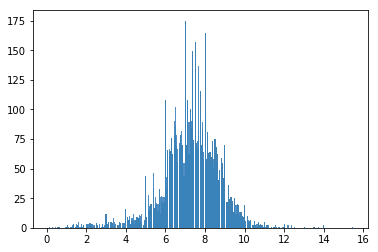

In [10]:
tw_firsts_hist = thinkstats2.Hist(firsts.totalwgt_lb)
tw_others_hist = thinkstats2.Hist(others.totalwgt_lb)

import thinkplot
thinkplot.Hist(tw_firsts_hist)
thinkplot.Hist(tw_others_hist)
import matplotlib.pyplot as plt
plt.show()